<a href="https://colab.research.google.com/github/rks12/Spark-Foundation-Internship-Task1/blob/main/Traing_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np
from sklearn import datasets
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target


In [2]:
print(x.dtype,y.dtype)
print(x.shape, y.shape)

float64 object
(70000, 784) (70000,)


In [3]:
def plot_img(images,labels):
    n_cols=min(5,len(images))
    n_rows=len(images)//n_cols
    fig=plt.figure(figsize=(8,8))

    for i in range(n_rows*n_cols):
        sp=fig.add_subplot(n_rows,n_cols,i+1)
        plt.axis('off')
        plt.imshow(images[i],cmap=plt.cm.gray)
        sp.set_title(labels[i])


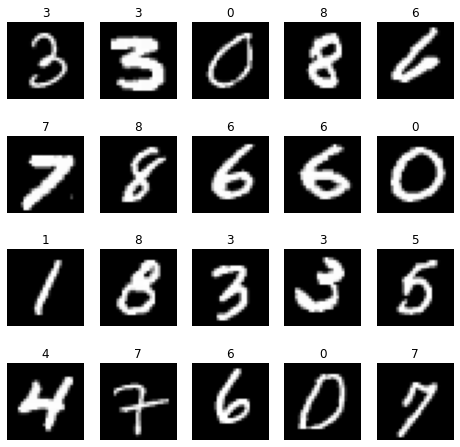

In [4]:
plt.show()
p= np.random.permutation(len(x))
p=p[:20]
plot_img(x[p].reshape(-1,28,28),y[p])  # showing digits with their real numaric values

In [5]:
y=y.astype('int32')
x=x/255.0
x.min(),x.max()

(0.0, 1.0)

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y)
train_x.shape,test_x.shape

((52500, 784), (17500, 784))

In [7]:
from sklearn.naive_bayes import MultinomialNB
cls=MultinomialNB()
cls.fit(train_x,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
cls.score(test_x,test_y)

0.8274857142857143

In [9]:
from sklearn.metrics import classification_report
predict=cls.predict(test_x)
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1733
           1       0.90      0.94      0.92      1906
           2       0.86      0.83      0.85      1754
           3       0.80      0.80      0.80      1763
           4       0.83      0.75      0.79      1716
           5       0.85      0.67      0.75      1577
           6       0.87      0.91      0.89      1695
           7       0.94      0.83      0.88      1813
           8       0.67      0.78      0.72      1748
           9       0.69      0.82      0.75      1795

    accuracy                           0.83     17500
   macro avg       0.83      0.83      0.83     17500
weighted avg       0.83      0.83      0.83     17500



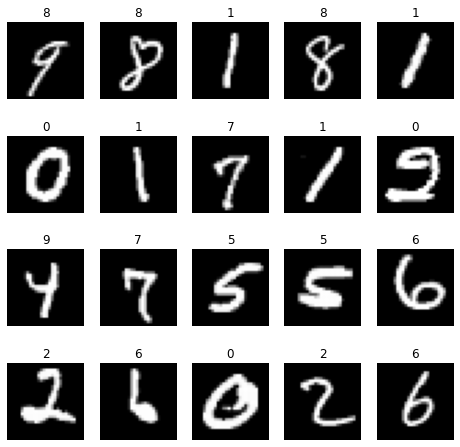

In [10]:
plt.show()
p= np.random.permutation(len(test_x))
p=p[:20]
plot_img(test_x[p].reshape(-1,28,28),predict[p]) # making predictions